In [328]:
import pandas as pd

train = pd.read_csv('ExploringMentalHealthData/train.csv')
test = pd.read_csv('ExploringMentalHealthData/test.csv')

In [329]:
train.drop(columns=['id'], inplace=True)
train.drop(columns=['Name'], inplace=True)

In [ ]:
train.drop(columns=['id'], inplace=True)
train.drop(columns=['Name'], inplace=True)


In [331]:
# 이상치, 알 수 없는 값들 제거
delete_values = [
    'Indore', 'Pune', 'Moderate', 'Unhealthy', 'Sleep_Duration',
    'Work_Study_Hours', 'No', '45', '49 hours', '55-66 hours', '40-45 hours', 
    '9-5 hours', '10-6 hours', '9-6 hours', '9-5', '45-48 hours', '35-36 hours'
]

train['Sleep Duration'] = train['Sleep Duration'].replace(delete_values, np.nan)
train['Sleep Duration_missing'] = train['Sleep Duration'].isnull().astype(int)
mode_val = train["Sleep Duration"].mode()[0]
train["Sleep Duration"] = train["Sleep Duration"].fillna(mode_val)

In [334]:
import numpy as np
import re

def convert_sleep_to_hours(val):
    try:
        val = str(val).strip().lower()

        # 특별 처리: 'than n hours' → 'less than n hours' 간주
        if 'than' in val and 'less' not in val and 'more' not in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # Less than n hours → n - 0.5
        if 'less than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # More than n hours → n + 0.5
        elif 'more than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) + 0.5

        # 정확히 n hours → 숫자만 추출
        elif re.match(r'^\d+\s*hours$', val):
            return float(re.findall(r'\d+', val)[0])

        # n-m hours 또는 n–n → 평균값
        elif re.search(r'\d+\s*[-–~]\s*\d+', val):
            nums = [int(n) for n in re.findall(r'\d+', val)]
            if len(nums) == 2:
                return sum(nums) / 2

        # 숫자만 → 그대로
        elif re.match(r'^\d+(\.\d+)?$', val):
            return float(val)

        # 나머지는 이상값으로 간주
        else:
            return np.nan

    except:
        return np.nan


In [335]:
train['Sleep Duration'] = train['Sleep Duration'].apply(convert_sleep_to_hours)

In [339]:
# 1. CGPA 컬럼 제거
train.drop(columns=['CGPA'], inplace=True)

In [340]:
# 2. Academic Pressure 결측 여부 파생 변수
train['Academic_Pressure_missing'] = train['Academic Pressure'].isnull().astype(int)

# 3. Study Satisfaction 결측 여부 파생 변수
train['Study_Satisfaction_missing'] = train['Study Satisfaction'].isnull().astype(int)

In [343]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 또는 'median', 'most_frequent'
train['Academic Pressure'] = imputer.fit_transform(train[['Academic Pressure']])
train['Study Satisfaction'] = imputer.fit_transform(train[['Study Satisfaction']])

In [346]:
train['Financial Stress'] = train['Financial Stress'].fillna(2.0)

In [347]:
train['Work_Pressure_missing'] = train['Work Pressure'].isnull().astype(int)
train['Job_Satisfaction_missing'] = train['Job Satisfaction'].isnull().astype(int)

In [348]:
train['Work Pressure'] = imputer.fit_transform(train[['Work Pressure']])
train['Job Satisfaction'] = imputer.fit_transform(train[['Job Satisfaction']])

In [350]:
train['Profession'].fillna('Missing', inplace=True)

C:\Users\asdf-\AppData\Local\Temp\ipykernel_14316\4215184188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Profession'].fillna('Missing', inplace=True)


In [353]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

scaler = StandardScaler()
train[scale_cols] = scaler.fit_transform(train[scale_cols])


In [355]:
binary_cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_cols:
    train[col] = train[col].map({'Yes': 1, 'No': 0})

In [356]:
# 상위 15개 도시만 유지
top_cities = train['City'].value_counts().nlargest(15).index
train['City'] = train['City'].where(train['City'].isin(top_cities), other='Other')

In [359]:
degree_group_map = {
    # 의학/보건
    'MD': 'Medical',
    'MBBS': 'Medical',
    'B.Pharm': 'Pharmacy',
    'M.Pharm': 'Pharmacy',
    'MPharm': 'Pharmacy',
    'P.Pharm': 'Pharmacy',
    'S.Pharm': 'Pharmacy',
    'N.Pharm': 'Pharmacy',

    # 공학/기술
    'B.Tech': 'Engineering',
    'M.Tech': 'Engineering',
    'ME': 'Engineering',
    'MTech': 'Engineering',
    'M_Tech': 'Engineering',
    'BE': 'Engineering',
    'BCA': 'Engineering',
    'MCA': 'Engineering',
    'E.Tech': 'Engineering',
    'S.Tech': 'Engineering',
    'LLTech': 'Engineering',
    'LLCom': 'Engineering',

    # 인문/사회/비즈니스
    'BBA': 'Business',
    'MBA': 'Business',
    'M. Business Analyst': 'Business',
    'B.Com': 'Commerce',
    'M.Com': 'Commerce',
    'P.Com': 'Commerce',
    'LLB': 'Law',
    'LLM': 'Law',
    'LLBA': 'Law',
    'LL.Com': 'Law',
    'LL B.Ed': 'Education',
    'B.Ed': 'Education',
    'M.Ed': 'Education',
    'L.Ed': 'Education',
    'K.Ed': 'Education',
    'LLEd': 'Education',
    'BEd': 'Education',

    # 과학
    'BSc': 'Science',
    'MSc': 'Science',
    'B.Sc': 'Science',

    # 기타, 건축, 호텔경영 등
    'BHM': 'Hospitality',
    'MHM': 'Hospitality',
    'B.Arch': 'Architecture',
    'M.Arch': 'Architecture',
    'BArch': 'Architecture',
    'B.B.Arch': 'Architecture',

    # 학위 및 학교 졸업
    'PhD': 'PhD',
    'Class 12': 'School',
    'Class 11': 'School',
}

train['degree_group'] =train['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))

train=train.drop('Degree',axis=1)

Moderate, Unhealthy, Healthy는 명확한 카테고리

나머지는 이상값 / 오입력 / 다른 컬럼에서 잘못 섞인 값임

In [361]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64

In [362]:
# 정상 값만 남기고 나머지는 NaN으로
valid_dietary = ['Moderate', 'Unhealthy', 'Healthy']
train['Dietary Habits'] = train['Dietary Habits'].where(train['Dietary Habits'].isin(valid_dietary))

# 결측값은 최빈값으로 대체
train['Dietary Habits'] = train['Dietary Habits'].fillna(train['Dietary Habits'].mode()[0])


In [363]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49732
Unhealthy    46227
Healthy      44741
Name: count, dtype: int64

In [364]:
from sklearn.preprocessing import LabelEncoder

# Gender, Working Status - Binary
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Working Professional or Student'] = train['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})

# Degree, Dietary Habits - One-hot encoding
train = pd.get_dummies(train, columns=['degree_group', 'Dietary Habits'], drop_first=True)

# Profession, City - Target encoding (또는 frequency encoding)
# 예: Target Mean Encoding (Depression 컬럼 사용)
profession_target_mean = train.groupby('Profession')['Depression'].mean()
train['Profession' + '_target'] = train['Profession'].map(profession_target_mean)
city_target_mean = train.groupby('City')['Depression'].mean()
train['City' + '_target'] = train['City'].map(city_target_mean)

# 이후 필요시 원본 컬럼 제거
train.drop(columns=['Profession', 'City'], inplace=True)

In [365]:
train

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,...,degree_group_Medical,degree_group_Other,degree_group_PhD,degree_group_Pharmacy,degree_group_School,degree_group_Science,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Profession_target,City_target
0,0,0.695360,1,3.142273,5.000000,2.94494,2.000000,1.291858,0,-1.363057,...,False,False,False,False,False,False,False,False,0.048567,0.192690
1,1,-1.161867,1,3.142273,4.000000,2.94494,3.000000,-1.225519,1,0.193928,...,False,False,False,False,False,False,False,True,0.055649,0.186194
2,1,-0.596624,0,5.000000,2.998998,2.00000,2.974404,-0.596175,1,-0.844062,...,False,False,False,True,False,False,False,False,0.534944,0.159196
3,1,-1.484863,1,3.142273,5.000000,2.94494,1.000000,-1.225519,1,0.972421,...,False,False,False,False,False,False,True,False,0.055649,0.131293
4,0,-0.838871,1,3.142273,1.000000,2.94494,1.000000,-0.596175,1,0.712923,...,False,False,False,False,False,False,False,True,0.056628,0.186194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,-1.807859,1,3.142273,5.000000,2.94494,4.000000,-0.596175,0,-1.103560,...,False,False,False,False,True,False,False,True,0.534944,0.217887
140696,0,0.049368,1,3.142273,5.000000,2.94494,4.000000,0.662513,1,-0.065570,...,False,False,False,False,False,False,True,False,0.018684,0.186194
140697,0,-1.323365,1,3.142273,3.000000,2.94494,1.000000,1.291858,0,-0.584565,...,False,False,False,False,False,False,True,False,0.050607,0.173668
140698,0,0.695360,1,3.142273,5.000000,2.94494,2.000000,-0.596175,1,0.972421,...,False,False,False,False,False,False,True,False,0.064073,0.211667


In [366]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    train_copy = train

    y_target = train_copy['Depression']
    X_features = train_copy.drop('Depression', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                        test_size=0.3, random_state=0, stratify=y_target)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(train)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(
    n_estimators=100,       # 트리 개수 (적당함)
    max_depth=4,            # 과적합 방지용 적당한 깊이
    learning_rate=0.1,      # 기본 학습률
    subsample=0.8,          # 전체 샘플 중 일부만 사용 → 일반화 성능↑
    colsample_bytree=0.8,   # 피처 중 일부만 사용 → 과적합 방지
    use_label_encoder=False,
    eval_metric='logloss',  # 분류 문제의 표준 평가지표
    random_state=42,
    n_jobs=-1               # 병렬 처리
)



In [367]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    train_copy = train

    y_target = train_copy['Depression']
    X_features = train_copy.drop('Depression', axis=1)

    X_train_val, X_test, y_train_val, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

    return X_train, X_test, y_train, y_test, X_val, y_val

X_train, X_test, y_train, y_test, X_val, y_val = get_train_test_dataset(train)

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_step1 = {
    'n_estimators': [1000], # 고정 (또는 초기 범위)
    'learning_rate': [0.05], # 고정 (또는 초기 범위)
    'max_depth': [4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 7],
}

param_grid_step2 = {
    'n_estimators': [1000],
    'learning_rate': [0.05],
    'max_depth': [4], # 1단계 최적값
    'min_child_weight': [1], # 1단계 최적값
    'gamma': [0, 0.05, 0.1, 0.2, 0.3],
}

param_grid_step3 = {
    'n_estimators': [1000],
    'learning_rate': [0.05],
    'max_depth': [4],
    'min_child_weight': [1],
    'gamma': [0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

param_grid_step4 = {
    'n_estimators': [1000],
    'learning_rate': [0.05],
    'max_depth': [4],
    'min_child_weight': [1],
    'gamma': [0.3],
    'subsample': [1.0],
    'colsample_bytree': [0.7],
    'reg_lambda': [0.5, 1, 1.5, 2, 3],
    'reg_alpha': [0, 0.005, 0.01, 0.05, 0.1],
}

param_grid_step5 = {
    'n_estimators': [2000, 3000, 4000],
    'learning_rate': [0.01, 0.02, 0.03],
    'max_depth': [4],
    'min_child_weight': [1],
    'gamma': [0.3],
    'subsample': [1.0],
    'colsample_bytree': [0.7],
    'reg_lambda': [0.5, 1, 1.5, 2, 3],
    'reg_alpha': [0, 0.005, 0.01, 0.05, 0.1],
}

param_grid_step_final = {
    'colsample_bytree': [0.7],
 'gamma': [0.3],
 'learning_rate': [0.03],
 'max_depth': [4],
 'min_child_weight': [1],
 'n_estimators': [2000],
 'reg_alpha': [0.05],
 'reg_lambda': [2],
 'subsample': [1.0]
}



grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_step_final,
    cv=3,                        # 3-fold 교차검증
    scoring='accuracy',         # 또는 'f1', 'roc_auc' 등
    verbose=1,
    n_jobs=-1
)

# 5단계: learning_rate와 n_estimators 최종 미세 조정:
# 이전 단계에서 찾은 모든 최적 파라미터들을 고정합니다.
# learning_rate를 더 낮은 값 (예: 0.01, 0.02, 0.03)으로 줄이고, 이에 맞춰 n_estimators를 더 높게 (예: 2000, 3000, 4000) 설정하여 모델의 수렴을 더 안정적으로 만듭니다. 
# 이때 조기 종료 (early stopping)를 반드시 사용하여 불필요한 계산을 줄여야 합니다.


# 4. GridSearchCV 학습 및 조기 종료 적용 (이제 X_val, y_val 사용 가능)
fit_params = {
    "eval_set": [(X_val, y_val),], # << 이제 검증 세트 X_val, y_val을 전달합니다!
    "verbose": False
}
# 학습 (X_train, y_train 은 학습 데이터로 교체)
grid_search.fit(X_train, y_train)



#5. 결과 출력
print("최적 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\asdf-\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:40:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


최적 파라미터: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 2000, 'reg_alpha': 0.05, 'reg_lambda': 2, 'subsample': 1.0}
최고 정확도: 0.9385809049988154


                                  Feature  Importance
8   Have you ever had suicidal thoughts ?    0.361750
1                                     Age    0.184310
3                       Academic Pressure    0.085304
16               Job_Satisfaction_missing    0.040227
6                        Job Satisfaction    0.036108
4                           Work Pressure    0.034977
10                       Financial Stress    0.034814
30               Dietary Habits_Unhealthy    0.027213
2         Working Professional or Student    0.018686
31                      Profession_target    0.014376


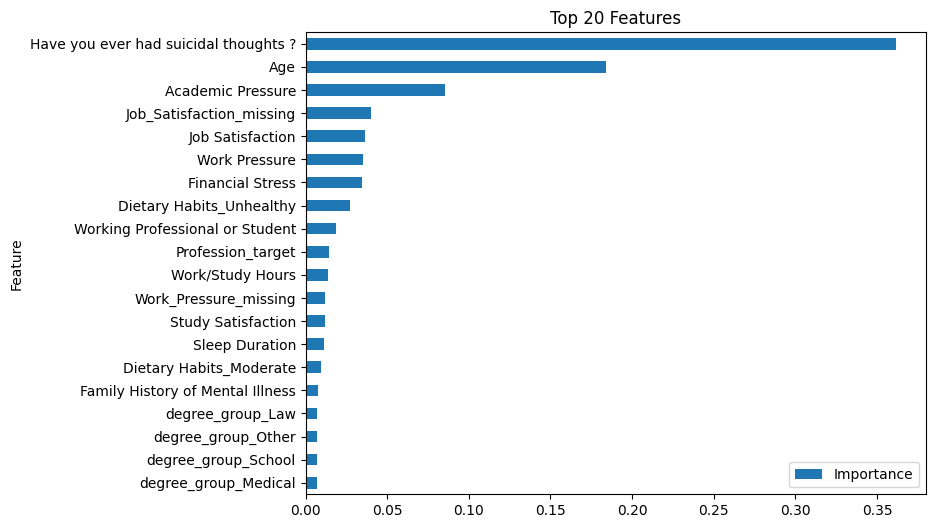

In [368]:
import matplotlib.pyplot as plt

model = XGBClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

# 중요도 DataFrame 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 N개 확인
print(importance_df.head(10))

# 시각화 (선택)
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', figsize=(8,6), title='Top 20 Features')
plt.gca().invert_yaxis()
plt.show()

In [369]:
from sklearn.metrics import accuracy_score, recall_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_recall = recall_score(y_test, y_pred)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall:   {y_recall:.4f}")

Accuracy: 0.9385
Recall:   0.8109


In [370]:
# 최적 모델로 테스트 세트 예측 및 평가
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"테스트 세트 정확도: {test_accuracy}")

테스트 세트 정확도: 0.9384506041222459


In [371]:
test_df= pd.read_csv('ExploringMentalHealthData/test.csv')

test = test_df.copy()

In [372]:
test.drop(columns=['id'], inplace=True)
test.drop(columns=['Name'], inplace=True)

# 1. CGPA 컬럼 제거
test.drop(columns=['CGPA'], inplace=True)

##### Sleep Duration ##### 
test['Sleep Duration'].value_counts()

# 이상치, 알 수 없는 값들 제거
delete_values = [
    'Indore', 'Pune', 'Moderate', 'Unhealthy', 'Sleep_Duration',
    'Work_Study_Hours', 'No', '45', '49 hours', '55-66 hours', '40-45 hours', 
    '9-5 hours', '10-6 hours', '9-6 hours', '9-5', '45-48 hours', '35-36 hours'
]

test['Sleep Duration'] = test['Sleep Duration'].replace(delete_values, np.nan)
test['Sleep Duration_missing'] = test['Sleep Duration'].isnull().astype(int)
mode_val = test["Sleep Duration"].mode()[0]
test["Sleep Duration"] = test["Sleep Duration"].fillna(mode_val)

import numpy as np
import re

def convert_sleep_to_hours(val):
    try:
        val = str(val).strip().lower()

        # 특별 처리: 'than n hours' → 'less than n hours' 간주
        if 'than' in val and 'less' not in val and 'more' not in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # Less than n hours → n - 0.5
        if 'less than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) - 0.5

        # More than n hours → n + 0.5
        elif 'more than' in val:
            match = re.search(r'\d+', val)
            if match:
                return float(match.group()) + 0.5

        # 정확히 n hours → 숫자만 추출
        elif re.match(r'^\d+\s*hours$', val):
            return float(re.findall(r'\d+', val)[0])

        # n-m hours 또는 n–n → 평균값
        elif re.search(r'\d+\s*[-–~]\s*\d+', val):
            nums = [int(n) for n in re.findall(r'\d+', val)]
            if len(nums) == 2:
                return sum(nums) / 2

        # 숫자만 → 그대로
        elif re.match(r'^\d+(\.\d+)?$', val):
            return float(val)

        # 나머지는 이상값으로 간주
        else:
            return np.nan

    except:
        return np.nan
test['Sleep Duration'] = test['Sleep Duration'].apply(convert_sleep_to_hours)

##### Sleep Duration ##### 
from sklearn.impute import SimpleImputer


# 2. Academic Pressure 결측 여부 파생 변수
test['Academic_Pressure_missing'] = test['Academic Pressure'].isnull().astype(int)

# 3. Study Satisfaction 결측 여부 파생 변수
test['Study_Satisfaction_missing'] = test['Study Satisfaction'].isnull().astype(int)

imputer = SimpleImputer(strategy='mean')  # 또는 'median', 'most_frequent'
test['Academic Pressure'] = imputer.fit_transform(test[['Academic Pressure']])
test['Study Satisfaction'] = imputer.fit_transform(test[['Study Satisfaction']])

# 4. Financial Stress
test['Financial Stress'] = test['Financial Stress'].fillna(2.0)

# 5. Work_Pressure
test['Work_Pressure_missing'] = test['Work Pressure'].isnull().astype(int)

# 6. Job_Satisfaction
test['Job_Satisfaction_missing'] = test['Job Satisfaction'].isnull().astype(int)

test['Work Pressure'] = imputer.fit_transform(test[['Work Pressure']])
test['Job Satisfaction'] = imputer.fit_transform(test[['Job Satisfaction']])

# 7. Profession
test['Profession'].fillna('Missing', inplace=True)

from sklearn.preprocessing import StandardScaler

scale_cols = ['Age', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

scaler = StandardScaler()
test[scale_cols] = scaler.fit_transform(test[scale_cols])

# # 8. 
binary_cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_cols:
    test[col] = test[col].map({'Yes': 1, 'No': 0})

# # 9. City
# 상위 15개 도시만 유지
top_cities = test['City'].value_counts().nlargest(15).index
test['City'] = test['City'].where(test['City'].isin(top_cities), other='Other')


# # Degree
test['Degree'].value_counts()

degree_group_map = {
    # 의학/보건
    'MD': 'Medical',
    'MBBS': 'Medical',
    'B.Pharm': 'Pharmacy',
    'M.Pharm': 'Pharmacy',
    'MPharm': 'Pharmacy',
    'P.Pharm': 'Pharmacy',
    'S.Pharm': 'Pharmacy',
    'N.Pharm': 'Pharmacy',

    # 공학/기술
    'B.Tech': 'Engineering',
    'M.Tech': 'Engineering',
    'ME': 'Engineering',
    'MTech': 'Engineering',
    'M_Tech': 'Engineering',
    'BE': 'Engineering',
    'BCA': 'Engineering',
    'MCA': 'Engineering',
    'E.Tech': 'Engineering',
    'S.Tech': 'Engineering',
    'LLTech': 'Engineering',
    'LLCom': 'Engineering',

    # 인문/사회/비즈니스
    'BBA': 'Business',
    'MBA': 'Business',
    'M. Business Analyst': 'Business',
    'B.Com': 'Commerce',
    'M.Com': 'Commerce',
    'P.Com': 'Commerce',
    'LLB': 'Law',
    'LLM': 'Law',
    'LLBA': 'Law',
    'LL.Com': 'Law',
    'LL B.Ed': 'Education',
    'B.Ed': 'Education',
    'M.Ed': 'Education',
    'L.Ed': 'Education',
    'K.Ed': 'Education',
    'LLEd': 'Education',
    'BEd': 'Education',

    # 과학
    'BSc': 'Science',
    'MSc': 'Science',
    'B.Sc': 'Science',

    # 기타, 건축, 호텔경영 등
    'BHM': 'Hospitality',
    'MHM': 'Hospitality',
    'B.Arch': 'Architecture',
    'M.Arch': 'Architecture',
    'BArch': 'Architecture',
    'B.B.Arch': 'Architecture',

    # 학위 및 학교 졸업
    'PhD': 'PhD',
    'Class 12': 'School',
    'Class 11': 'School',
}

test['degree_group'] =test['Degree'].apply(lambda x: degree_group_map.get(x, 'Other'))

test=test.drop('Degree',axis=1)


# # Dietary Habits
# 정상 값만 남기고 나머지는 NaN으로
valid_dietary = ['Moderate', 'Unhealthy', 'Healthy']
test['Dietary Habits'] = test['Dietary Habits'].where(test['Dietary Habits'].isin(valid_dietary))

# 결측값은 최빈값으로 대체
test['Dietary Habits'] = test['Dietary Habits'].fillna(test['Dietary Habits'].mode()[0])

# Gender, Working Status - Binary
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Working Professional or Student'] = test['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})

# Degree, Dietary Habits - One-hot encoding
test = pd.get_dummies(test, columns=['degree_group', 'Dietary Habits'], drop_first=True)


test['Profession_target'] = test['Profession'].map(profession_target_mean)
test['City_target'] = test['City'].map(city_target_mean)

# 이후 필요시 원본 컬럼 제거
test.drop(columns=['Profession', 'City'], inplace=True)

C:\Users\asdf-\AppData\Local\Temp\ipykernel_14316\1701379026.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Profession'].fillna('Missing', inplace=True)


In [373]:
pred_submit = best_model.predict(test)

In [376]:
# 1. 샘플 제출 파일 불러오기
submission = pd.read_csv('ExploringMentalHealthData/sample_submission.csv')

# 3. 예측 결과를 Depression 컬럼에 저장
submission['Depression'] = pred_submit

# 4. 제출 파일 저장
submission.to_csv('submission_1_final.csv', index=False)